In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/sample_submission.csv


In [2]:

import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random 

from keras.models import Model, Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Dropout, Flatten, ReLU
from keras.losses import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:

df = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
x_train = np.array(df.iloc[:,1:])
y_train = np.array(df.iloc[:,0])

print('Length of input_texts:  ' + str(x_train.shape))
print('Length of target_texts: ' + str(y_train.shape))

x_train = np.reshape(x_train, (-1, 28, 28, 1))
print('Length of input_texts:  ' + str(x_train.shape))

def create_dev_set(x_train, y_train):
    #split the whole dataset to the training set and development set(validation set)
    return train_test_split(x_train, y_train, test_size=0.2, random_state=0)

x_train, x_dev, y_train, y_dev = create_dev_set(x_train, y_train)
print("the shape of training data ", x_train.shape)
print("the shape of training label ", y_train.shape)
print("the shape of dev data ", x_dev.shape)
print("the shape of dev label", y_dev.shape)

classes = np.unique(y_train)
num_classes = len(classes)
print(" number of diffrent outputs ", num_classes)
print(" different classes of outputs ", classes)

x_train = x_train.astype('float32')
x_dev = x_dev.astype('float32')
x_train = x_train / 255
x_dev = x_dev / 255

y_train_one_hot = np.array(to_categorical(y_train))
y_dev_one_hot = np.array(to_categorical(y_dev))

Length of input_texts:  (60000, 784)
Length of target_texts: (60000,)
Length of input_texts:  (60000, 28, 28, 1)
the shape of training data  (48000, 28, 28, 1)
the shape of training label  (48000,)
the shape of dev data  (12000, 28, 28, 1)
the shape of dev label (12000,)
 number of diffrent outputs  10
 different classes of outputs  [0 1 2 3 4 5 6 7 8 9]


In [4]:
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Activation,Dropout

In [5]:
nets = 20
model = [0] *nets
for j in range(20):
  model[j] = Sequential()

  model[j].add(Conv2D(32,kernel_size=3,input_shape=(28,28,1)))
  model[j].add(BatchNormalization())
  model[j].add(Activation('relu'))
  model[j].add(Conv2D(32,kernel_size=3))
  model[j].add(BatchNormalization())
  model[j].add(Activation('relu'))
  model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same'))
  model[j].add(BatchNormalization())
  model[j].add(Activation('relu'))
  model[j].add(Dropout(0.2))

  model[j].add(Conv2D(64,kernel_size=3))
  model[j].add(BatchNormalization())
  model[j].add(Activation('relu'))
  model[j].add(Conv2D(64,kernel_size=3))
  model[j].add(BatchNormalization())
  model[j].add(Activation('relu'))
  model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same'))
  model[j].add(BatchNormalization())
  model[j].add(Activation('relu'))
  model[j].add(Dropout(0.2))

  model[j].add(Flatten())
  model[j].add(Dense(512))
  model[j].add(BatchNormalization())
  model[j].add(Activation('relu'))
#   model[j].add(Dropout(0.2))
  model[j].add(Dense(10, activation='softmax'))
#   model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
  model[j].compile( optimizer=optimizers.RMSprop(lr=1E-4), loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
model[19].summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_134 (Bat (None, 26, 26, 32)        128       
_________________________________________________________________
activation_134 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_135 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
activation_135 (Activation)  (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 12, 12, 32)      

In [7]:
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [9]:
annealer = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x+ 50))
training = model[19].fit_generator(datagen.flow(x_train,y_train_one_hot, batch_size=128), epochs = 50, 
    steps_per_epoch = x_train.shape[0]//64, callbacks=[annealer], verbose=1, validation_data=(x_dev, y_dev_one_hot))

Epoch 1/50
750/750 [==============================] - 50s 66ms/step - loss: 0.1068 - accuracy: 0.9661 - val_loss: 0.0310 - val_accuracy: 0.9920
Epoch 2/50
750/750 [==============================] - 45s 60ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0338 - val_accuracy: 0.9904
Epoch 3/50
750/750 [==============================] - 45s 60ms/step - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0238 - val_accuracy: 0.9930
Epoch 4/50
750/750 [==============================] - 44s 59ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0278 - val_accuracy: 0.9928
Epoch 5/50
750/750 [==============================] - 44s 59ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0228 - val_accuracy: 0.9947
Epoch 6/50
750/750 [==============================] - 46s 61ms/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0126 - val_accuracy: 0.9968
Epoch 7/50
750/750 [==============================] - 45s 59ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0135 - val_accuracy:

In [10]:

model[19].save("Conv2D_trail3.h5py")

test_eval = model[19].evaluate(x_dev, y_dev_one_hot, verbose=1)
print(test_eval)

12000/12000 [==============================] - 2s 183us/step
[0.013076756869913515, 0.9977499842643738]


In [11]:
accuracy = training.history['accuracy']
val_accuracy = training.history['val_accuracy']
loss = training.history['loss']
val_loss = training.history['val_loss']

epochs = range(len(accuracy))

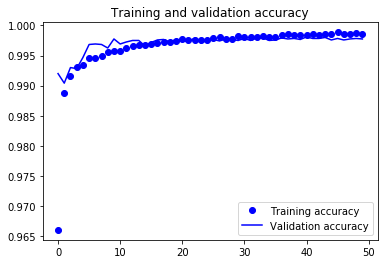

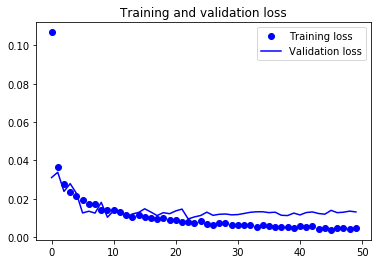

/kaggle/working/Conv2D_trail3.h5py

In [12]:

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
from IPython.display import FileLink
FileLink(r"Conv2D_trail3.h5py")

In [13]:
print("Training dataset evaluation")
test_eval = model.evaluate(x_train, y_train_one_hot, verbose=1)
print(test_eval)

print("Validation dataset evaluation")
test_eval = model.evaluate(x_dev, y_dev_one_hot, verbose=1)
print(test_eval)

Training dataset evaluation


AttributeError: 'list' object has no attribute 'evaluate'

In [14]:
model = load_model(r"Conv2D_trail3.h5py")
df_test = pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv")
x_test = np.array(df_test.iloc[:,1:])
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

x_test = x_test.astype('float32')
x_test = x_test / 255

res = model.predict(x_test)
res = pd.DataFrame(np.argmax(np.round(res), axis=1))
res.columns = ['label']
image_id = pd.DataFrame(np.arange(0, x_test.shape[0], dtype=int))
image_id.columns = ['id']
result = pd.concat([image_id, res], axis=1)

result1=result.dropna()
print(result1)
result1.to_csv(r"submission.csv", index=False)

        id  label
0        0      3
1        1      0
2        2      2
3        3      6
4        4      7
...    ...    ...
4995  4995      1
4996  4996      0
4997  4997      1
4998  4998      6
4999  4999      3

[5000 rows x 2 columns]
